In [131]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [133]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [134]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [135]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [136]:
(lead.isnull().sum()[lead.isnull().sum()!=0]/lead.shape[0])*100

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

#### Dropping the columns which are having more that 45% of the data missing

In [137]:
# lead = lead.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])
missing_cols = []
for col in lead.columns:
    if ((lead[col].isnull().mean())*100) > 45:
        missing_cols.append(col)
lead = lead.drop(columns=missing_cols)

#### Filling the columns which are having more than 5% of data as missing values with 'Unknown'.Imputing these high percent values of data can alter the predictions later

In [138]:
missing_cols_5 = []
for col in lead.columns:
    if ((lead[col].isnull().mean())*100) >5:
        missing_cols_5.append(col)
lead[missing_cols_5] = lead[missing_cols_5].fillna('Unknown')

#### Dropping the null rows from the data which are less than 5%

In [139]:
lead = lead.dropna()

#### Final checking on the dataframe if any null values left

In [140]:
(lead.isnull().sum()[lead.isnull().sum()!=0]/lead.shape[0])*100

Series([], dtype: float64)

#### Let's look at the categorical columns which have only one unique column and remove as they do not make a difference in the prediction

In [141]:
single_val_cols = []
for col in lead.columns:
    if lead[col].dtype=='object' and len(lead[col].unique()) <=1:
        single_val_cols.append(col)
lead = lead.drop(single_val_cols,axis=1)

#### Categorizing columns into categorical and numerical

In [143]:
cat_cols = list(lead.loc[:,lead.dtypes=='object'].columns)
num_cols = ['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Univariate Analysis

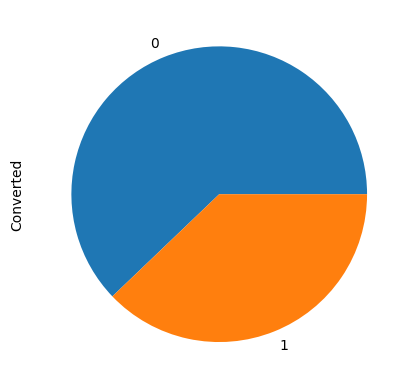

In [105]:
lead['Converted'].value_counts(normalize=True).plot.pie()
plt.show()

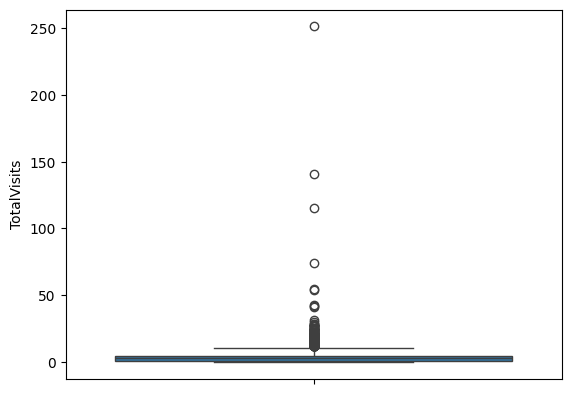

In [106]:
sns.boxplot(lead['TotalVisits'])
plt.show()

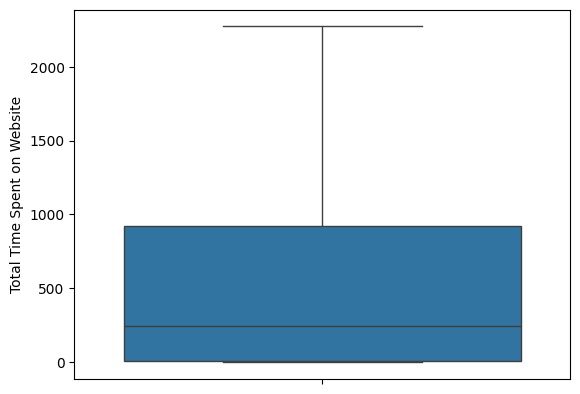

In [107]:
sns.boxplot(lead['Total Time Spent on Website'])
plt.show()

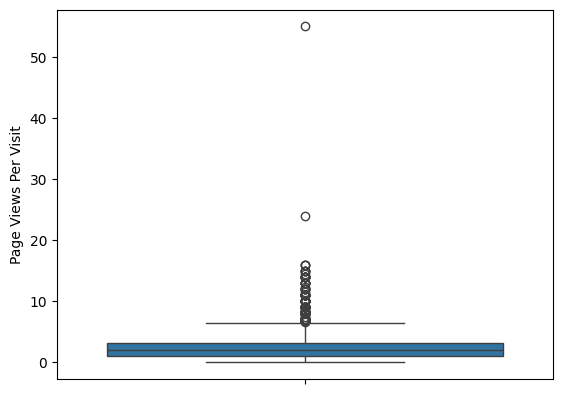

In [108]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

#### From the above boxplots it is evident that the columns 'TotalVisits' and 'Page Views Per Visit' have outliers lets impute them with the 99th percentile value

In [109]:
def impute_outliers(val,p):
    if val > p:
        return p
    else:
        return val
for col in ['TotalVisits','Page Views Per Visit']:
    p99 = np.percentile(lead[col],99)
    lead[col]=pd.Series(map(lambda x: x if x<= p99 else p99,lead[col]))

#### Now the outliers are removed lets plot and check on the page views per visit

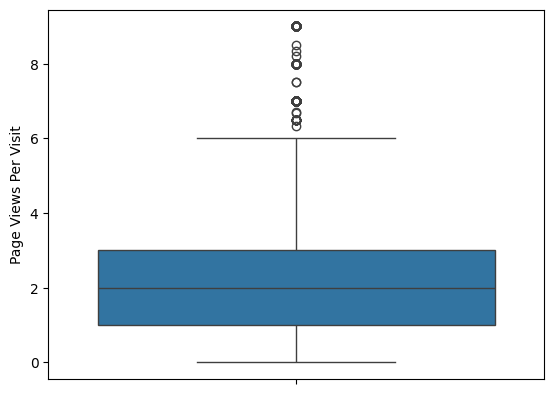

In [110]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

#### Bi-variate analysis

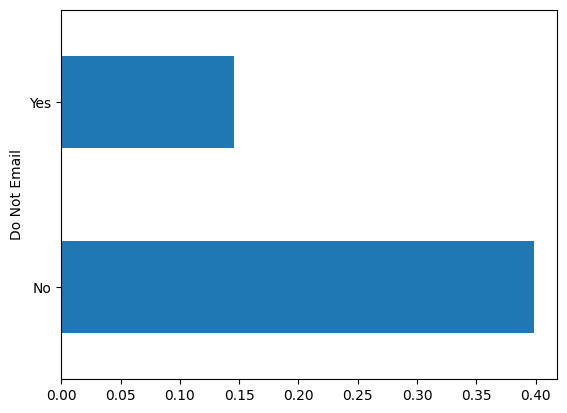

In [111]:
lead.groupby(by='Do Not Email')['Converted'].mean().plot.barh()
plt.show()

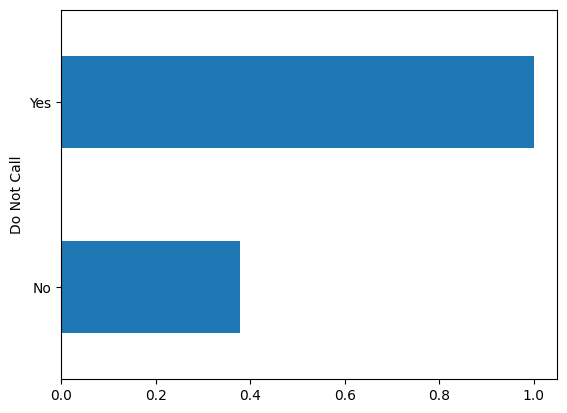

In [112]:
lead.groupby(by='Do Not Call')['Converted'].mean().plot.barh()
plt.show()

#### Bivariate analysis on countries with less than 10 leads

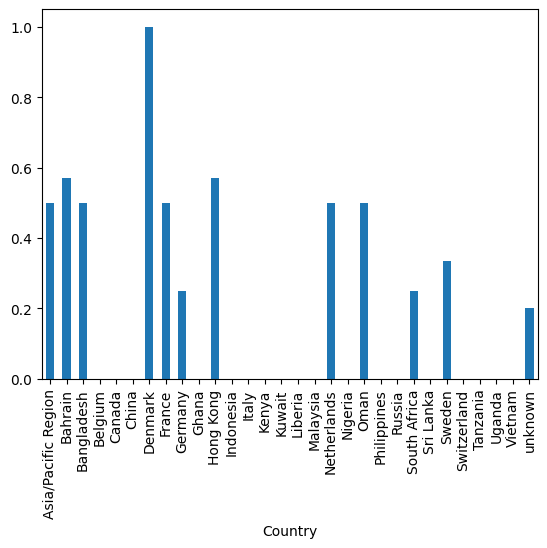

In [113]:
tar_countries = (lead['Country'].value_counts()[lead['Country'].value_counts()>=10]).index
lead[~lead['Country'].isin(tar_countries)].groupby(by='Country')['Converted'].mean().plot.bar()
plt.show()


#### So, from the above graph it is clear that , there are very few leads from these countries and most of these countries even have the conversion ratio as zero.

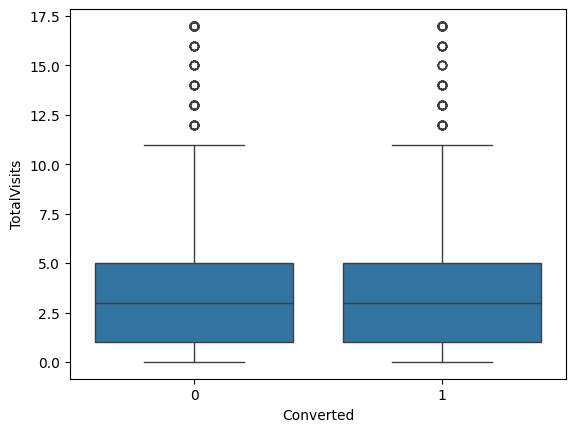

In [ ]:
sns.boxplot(data=lead,x=lead['Converted'],y=lead['TotalVisits'])
plt.show()

In [90]:
# num_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

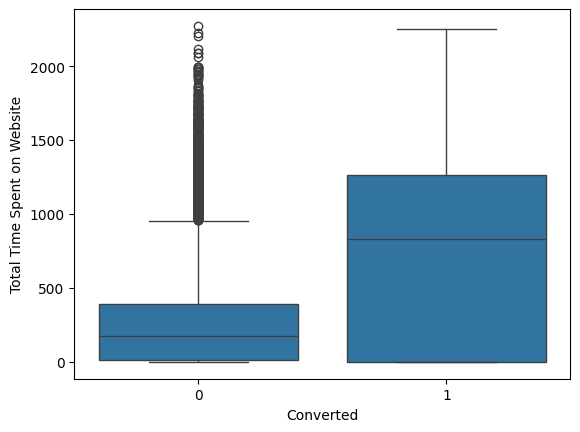

In [115]:
sns.boxplot(data=lead,x=lead['Converted'],y=lead['Total Time Spent on Website'])
plt.show()

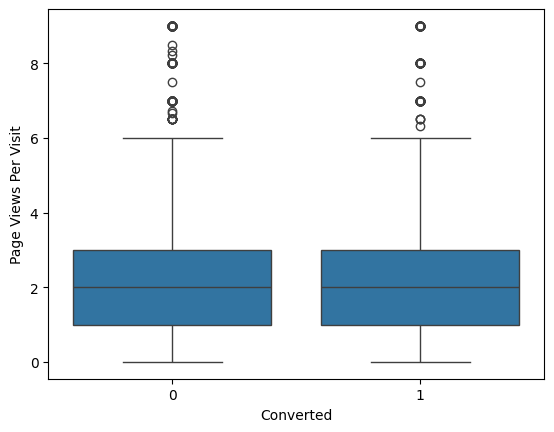

In [116]:
sns.boxplot(data=lead,x=lead['Converted'],y=lead['Page Views Per Visit'])
plt.show()

#### From the above plots the leads who are spending more time on the website are more like to be the hot leads

### Multi-variate analysis

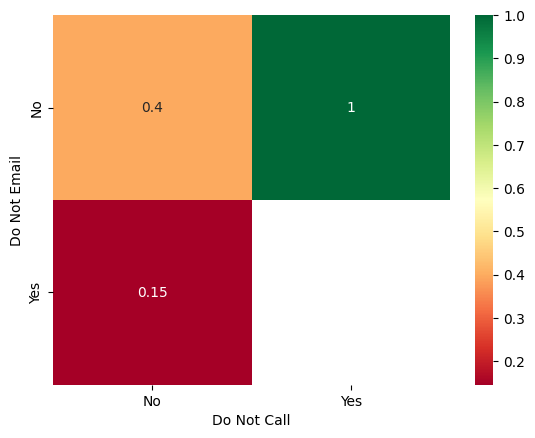

In [120]:
pv_tb1 = pd.pivot_table(data=lead,index='Do Not Email',columns='Do Not Call',values='Converted',aggfunc=np.mean)
sns.heatmap(data=pv_tb1,cmap='RdYlGn',annot=True)
plt.show()

#### From the above plot it is clear that the lead who do not want to receive calls but receive mails have highest percentage of conversion into hot leads

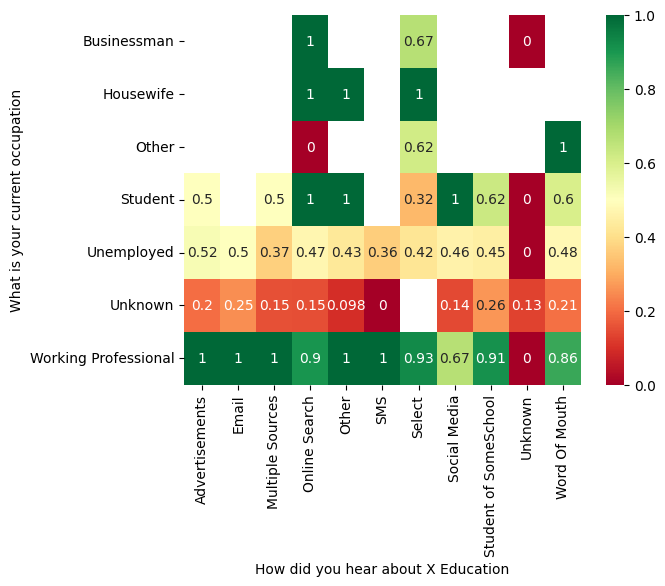

In [121]:
pv_tb2 = pd.pivot_table(data=lead,index='What is your current occupation',columns='How did you hear about X Education',values='Converted',aggfunc=np.mean)
sns.heatmap(data=pv_tb2,cmap='RdYlGn',annot=True)
plt.show()

#### From the above it is clear that the working professionals are the ones who are more likely to get coverted out of which the coversion rate is very low from the social media promotions to the working prefessionals

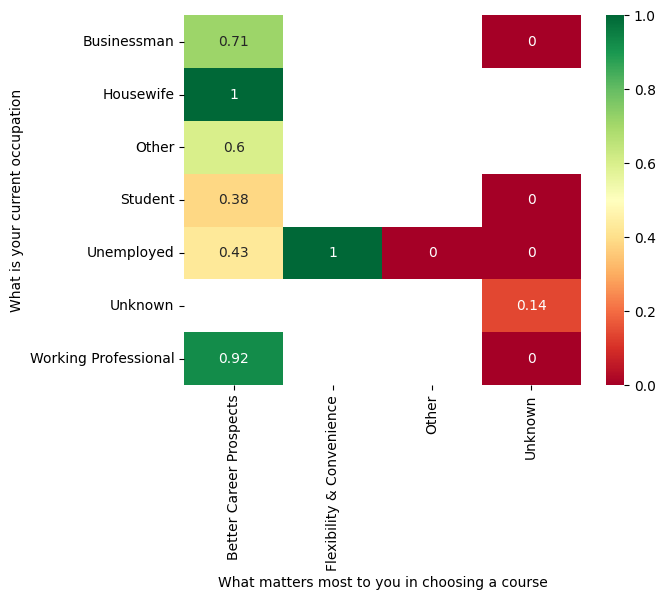

In [125]:
pv_tb3=pd.pivot_table(data=lead,index='What is your current occupation',columns='What matters most to you in choosing a course',values='Converted',aggfunc=np.mean)
sns.heatmap(data=pv_tb3,cmap='RdYlGn',annot=True)
plt.show()

#### From the above plot it is clear that both working professionals and housewifes who are choosing course for better career prospects ,the unemployed choosing Flexibility and convenience as most mattered aspects are likey to be the hot leads

In [ ]:
#### 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [26]:

label_encoder = preprocessing.LabelEncoder()
for col in cat_cols:
    lead[col] = label_encoder.fit_transform(lead[col])

In [27]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,1145,660728,0,6,0,0,0,2.0,674,2.0,...,0,0,14,0,0,4,4,0,0,4
2,3719,660727,1,1,0,0,1,1.0,1532,1.0,...,0,0,19,0,0,3,0,0,1,4
3,326,660719,1,1,0,0,0,2.0,305,1.0,...,0,0,14,0,0,4,0,0,0,8
4,1383,660681,1,3,0,0,1,2.0,1428,2.0,...,0,0,19,0,0,4,0,0,0,8
6,4180,660673,1,3,0,0,1,4.0,1640,4.0,...,0,0,19,0,0,3,0,0,0,8


In [28]:
lead = lead.drop(['Prospect ID','Lead Number'],axis = 1)

In [31]:
X = lead.drop(['Converted'],axis=1)
y = lead['Converted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [37]:
X_train

array([[ 0.60781573,  0.0130346 , -0.31209146, ...,  0.        ,
        -0.85150714,  0.19917882],
       [ 0.60781573,  0.0130346 , -0.31209146, ...,  0.        ,
        -0.85150714, -1.18334782],
       [ 0.60781573, -0.94154639, -0.31209146, ...,  0.        ,
         1.17438827, -1.18334782],
       ...,
       [ 0.60781573, -0.94154639, -0.31209146, ...,  0.        ,
         1.17438827, -1.18334782],
       [-1.57185705,  0.0130346 , -0.31209146, ...,  0.        ,
        -0.85150714, -1.18334782],
       [ 0.60781573,  0.0130346 , -0.31209146, ...,  0.        ,
        -0.85150714, -1.18334782]])

In [35]:
lg = LogisticRegression()

In [41]:
rfe = RFE(estimator=lg,n_features_to_select=15)

In [43]:
from statsmodels.api import sm

ImportError: cannot import name 'sm' from 'statsmodels.api' (c:\Users\marap\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\api.py)